In [118]:
import numpy as np
import math
import gurobipy as gp


import matplotlib.pyplot as plt
%matplotlib inline

class model:
    def __init__(self, N, func, dfunc):
        self.func = func
        self.dfunc = dfunc
        self.N = N
        
        
    def solve(self, x0=None, L=0.001, err=10**(-6), max_itr=100):
        dimension = self.N

    
        if type(x0) == type(None):
            x = np.ones(self.N)
        else:
            x = x0
            
        x_list = [x]


        lambda_prev = 0
        lambda_curr = 1
        gamma = 1
        x_prev = x
        alpha = 0.05 / (2 * L)
        
        L_tmp = 1

        # Set initial gradient
        y = x_prev
        gradient = self.dfunc(y)

        for i in range(max_itr):
            x_curr = y - alpha * gradient
            y = (1 - gamma) * x_curr + gamma * x_prev
            x_prev = x_curr
    
            lambda_tmp = lambda_curr
            lambda_curr = (1 + math.sqrt(1 + 4 * lambda_prev * lambda_prev)) / 2
            lambda_prev = lambda_tmp
    
            gamma = (1 - lambda_prev) / lambda_curr
    

            gradient = self.dfunc(y)
            x_list = x_list + [x_curr]

            if self.func(x_curr) <= err:
                break

        return x_curr, x_list
            
    def solve_Back(self, x0=None, L=10, err=10**(-6), max_itr=100):

        dimension = self.N
        if type(x0) == type(None):
            x = np.ones(self.N)
        else:
            x = x0
            
        x_list = [x]


        lambda_prev = 0
        lambda_curr = 1
        gamma = 1
        x_prev = x
        alpha = 0.05 / (2 * L)
        
        L_prev = L

        # Set initial gradient
        y = x_prev
        gradient = self.dfunc(y)
        
        
        def calc_L(x_prev, y_prev, L_prev, lambda_cur, lambda_prev, gradient_prev):
            i = 0
            eta = 1.1
            gamma_tmp = (1 - lambda_prev) / lambda_curr
            
            while True:
                L_tmp = (L_prev)*(eta**(i))
                alpha_tmp = 0.05 / (2 * L_tmp)
                x_curr_tmp = y_prev - alpha_tmp * gradient_prev
                
                F = self.func(x_curr_tmp)
                Q = self.func(y_prev) + (x_curr_tmp - y_prev)@self.dfunc(y_prev) + (L_tmp/(0.05))*(np.linalg.norm(x_curr_tmp - y_prev))**2
                
                
                if F<= Q:
                    break
                else:
                    i = i+1
            if i != 0:
                print(i)
                print('F=', F)
                print('Q=', Q)
            return L_tmp
                

        for i in range(max_itr):
            
            
            L_curr = calc_L(x_prev, y, L_prev, lambda_curr, lambda_prev, gradient)
            
            
            alpha = 0.05/(2*L_curr)
            x_curr = y - alpha * gradient
            y = (1 - gamma) * x_curr + gamma * x_prev
            x_prev = x_curr
    
            lambda_tmp = lambda_curr
            lambda_curr = (1 + math.sqrt(1 + 4 * lambda_prev * lambda_prev)) / 2
            lambda_prev = lambda_tmp
    
            gamma = (1 - lambda_prev) / lambda_curr
    

            gradient = self.dfunc(y)
            x_list = x_list + [x_curr]

            if self.func(x_curr) <= err:
                break
            
            L_prev = L_curr

        return x_curr, x_list

In [119]:
N = 10
# M = np.random.rand(N, N)

def f(x):
    return 0.5*(x@x)
def df(x):
    return x

m = model(10, f, df)

In [124]:
x, x_list = m.solve(L=1)
xB, xB_list = m.solve_Back(L=0.01)

10
F= 0.006531140016196811
Q= 0.18070888213085734


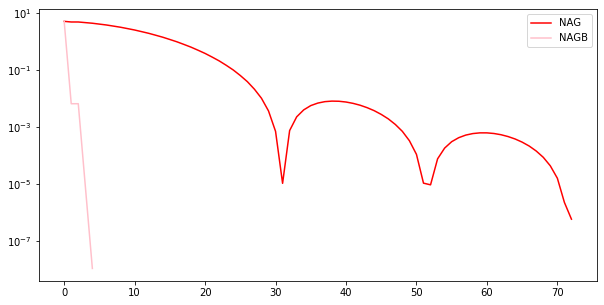

In [125]:
plt.figure(figsize=(10,5))
plt.plot([f(i) for i in x_list], label='NAG', color='red')
plt.plot([f(i) for i in xB_list], label='NAGB', color='pink')
plt.yscale('log')
plt.legend()